In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [65]:
import pandas as pd

file_path = "../data/avazu-ctr-prediction/train.gz"

# Read the .gzip file using Pandas
df = pd.read_csv(file_path, compression="gzip",nrows=100000)
print(df.shape)
df


(100000, 24)


,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7.336716e+18,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,5e3f096f,2347f47a,...,1,0,21611,320,50,2480,3,297,100111,61
99996,7.337102e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79
99997,7.337105e+18,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79
99998,7.337331e+17,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100000.0,9.500813e+18,5.669410e+18,3.237563e+13,4.183340e+18,1.074496e+19,1.457542e+19,1.844670e+19
click,100000.0,1.749000e-01,3.798834e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
hour,100000.0,1.410210e+07,0.000000e+00,1.410210e+07,1.410210e+07,1.410210e+07,1.410210e+07,1.410210e+07
C1,100000.0,1.005034e+03,1.088741e+00,1.001000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.010000e+03
banner_pos,100000.0,1.983000e-01,4.026397e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
device_type,100000.0,1.055730e+00,5.839928e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00
device_conn_type,100000.0,1.992700e-01,6.352681e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
C14,100000.0,1.768215e+04,3.237735e+03,3.750000e+02,1.570400e+04,1.765400e+04,2.036200e+04,2.170500e+04
C15,100000.0,3.183340e+02,1.193194e+01,1.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02,7.280000e+02
C16,100000.0,5.681892e+01,3.692410e+01,2.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,4.800000e+02


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                100000 non-null  float64
 1   click             100000 non-null  int64  
 2   hour              100000 non-null  int64  
 3   C1                100000 non-null  int64  
 4   banner_pos        100000 non-null  int64  
 5   site_id           100000 non-null  object 
 6   site_domain       100000 non-null  object 
 7   site_category     100000 non-null  object 
 8   app_id            100000 non-null  object 
 9   app_domain        100000 non-null  object 
 10  app_category      100000 non-null  object 
 11  device_id         100000 non-null  object 
 12  device_ip         100000 non-null  object 
 13  device_model      100000 non-null  object 
 14  device_type       100000 non-null  int64  
 15  device_conn_type  100000 non-null  int64  
 16  C14               100

In [68]:
df.duplicated().sum()

0

In [69]:
df['click'].value_counts()

click
0    82510
1    17490
Name: count, dtype: int64

<Axes: xlabel='click', ylabel='count'>

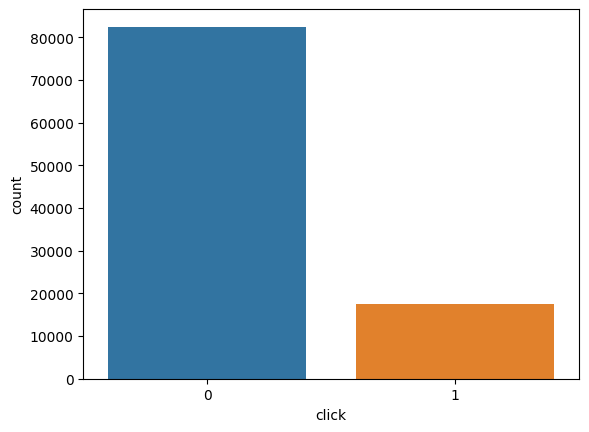

In [70]:
import seaborn as sns

sns.countplot(x=df['click'])

In [71]:
from datetime import datetime
df['hour'] = pd.to_datetime(df['hour'],format="%y%m%d%H")
print(f"Min Date: {df['hour'].min()}")
print(f"Max Date: {df['hour'].max()}")


Min Date: 2014-10-21 00:00:00
Max Date: 2014-10-21 00:00:00


So, all the data is of same day

In [72]:
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [73]:
df

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7.336716e+18,0,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,5e3f096f,2347f47a,...,1,0,21611,320,50,2480,3,297,100111,61
99996,7.337102e+18,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79
99997,7.337105e+18,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79
99998,7.337331e+17,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79


In [74]:
df

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,2014-10-21,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,7.336716e+18,0,2014-10-21,1005,0,85f751fd,c4e18dd6,50e219e0,5e3f096f,2347f47a,...,1,0,21611,320,50,2480,3,297,100111,61
99996,7.337102e+18,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79
99997,7.337105e+18,1,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15702,320,50,1722,0,35,-1,79
99998,7.337331e+17,0,2014-10-21,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79


In [75]:
# categorical column in df
categorical_column = df.select_dtypes(include=["object"]).columns

# Numerical column in df
non_categorical_column = df.select_dtypes(exclude=["object"]).columns



In [76]:
for col in categorical_column:
    print(f""" "{col}" has {df[col].nunique()} unique values and
            {df[col].isna().sum()/len(df[col])*100}% of NA values.""")

 "site_id" has 893 unique values and
            0.0% of NA values.
 "site_domain" has 780 unique values and
            0.0% of NA values.
 "site_category" has 16 unique values and
            0.0% of NA values.
 "app_id" has 704 unique values and
            0.0% of NA values.
 "app_domain" has 55 unique values and
            0.0% of NA values.
 "app_category" has 19 unique values and
            0.0% of NA values.
 "device_id" has 7202 unique values and
            0.0% of NA values.
 "device_ip" has 40376 unique values and
            0.0% of NA values.
 "device_model" has 2473 unique values and
            0.0% of NA values.


<Axes: >

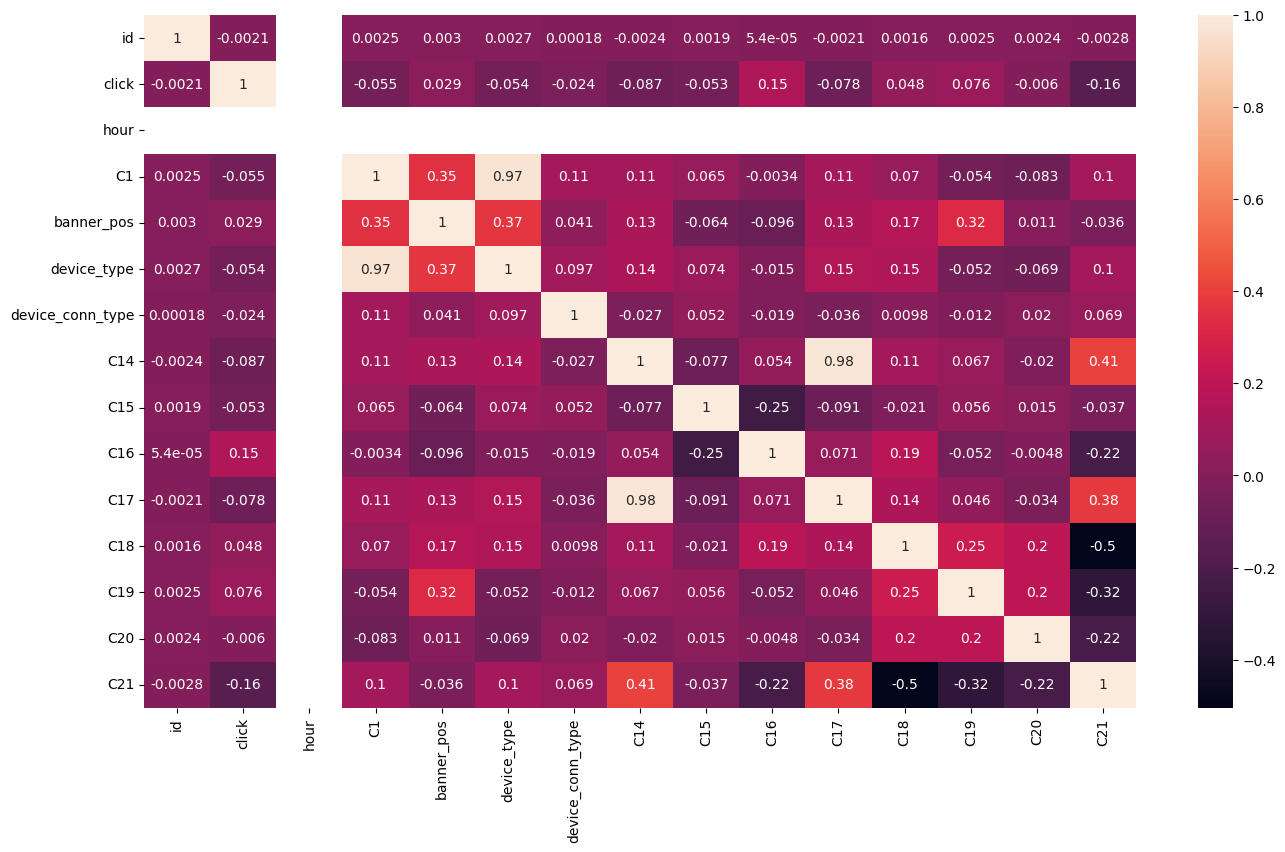

In [77]:
corrln = df[non_categorical_column].corr()

plt.figure(figsize=(16,9))

sns.heatmap(corrln,annot=True)

In [78]:
# column hour c1,c15,c17,c20,c21 are not contributing in click so can be deleted
df = df.drop(['id','hour','C1','C15','C17','C20','C21'],axis=1)

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
click,100000.0,0.17490,0.379883,0.0,0.0,0.0,0.0,1.0
banner_pos,100000.0,0.19830,0.402640,0.0,0.0,0.0,0.0,5.0
device_type,100000.0,1.05573,0.583993,0.0,1.0,1.0,1.0,5.0
device_conn_type,100000.0,0.19927,0.635268,0.0,0.0,0.0,0.0,5.0
C14,100000.0,17682.14590,3237.735265,375.0,15704.0,17654.0,20362.0,21705.0
C16,100000.0,56.81892,36.924104,20.0,50.0,50.0,50.0,480.0
C18,100000.0,0.78935,1.223761,0.0,0.0,0.0,2.0,3.0
C19,100000.0,131.73448,244.076787,33.0,35.0,35.0,39.0,1835.0


In [80]:
df[categorical_column]

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24
1,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120
2,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd
3,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a
4,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2
...,...,...,...,...,...,...,...,...,...
99995,85f751fd,c4e18dd6,50e219e0,5e3f096f,2347f47a,0f2161f8,a99f214a,7fa0b614,be74e6fe
99996,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b789b7fa,711ee120
99997,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,85cd2524,293291c1
99998,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,eee01b6c,8a4875bd


In [81]:
df['site_domain']

0        f3845767
1        f3845767
2        f3845767
3        f3845767
4        9166c161
           ...   
99995    c4e18dd6
99996    f3845767
99997    f3845767
99998    f3845767
99999    7256c623
Name: site_domain, Length: 100000, dtype: object

In [82]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in categorical_column:
    encoder.fit(df[col])

    df[col] = encoder.transform(df[col])

df

,click,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C16,C18,C19
0,0,0,104,742,2,656,23,0,4865,35026,678,1,2,15706,50,0,35
1,0,0,104,742,2,656,23,0,4865,23734,1084,1,0,15704,50,0,35
2,0,0,104,742,2,656,23,0,4865,28374,1322,1,0,15704,50,0,35
3,0,0,104,742,2,656,23,0,4865,36650,956,1,0,15706,50,0,35
4,0,1,881,439,0,656,23,0,4865,23697,1144,1,0,18993,50,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,475,595,6,269,6,2,4865,20063,1825,1,0,21611,50,3,297
99996,0,0,104,742,2,656,23,0,4865,28948,1084,1,0,15702,50,0,35
99997,1,0,104,742,2,656,23,0,4865,21048,396,1,0,15702,50,0,35
99998,0,0,104,742,2,656,23,0,4865,37678,1322,1,0,15708,50,0,35


In [83]:
X = df.drop('click',axis=1)
y = df['click']
X

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C16,C18,C19
0,0,104,742,2,656,23,0,4865,35026,678,1,2,15706,50,0,35
1,0,104,742,2,656,23,0,4865,23734,1084,1,0,15704,50,0,35
2,0,104,742,2,656,23,0,4865,28374,1322,1,0,15704,50,0,35
3,0,104,742,2,656,23,0,4865,36650,956,1,0,15706,50,0,35
4,1,881,439,0,656,23,0,4865,23697,1144,1,0,18993,50,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,475,595,6,269,6,2,4865,20063,1825,1,0,21611,50,3,297
99996,0,104,742,2,656,23,0,4865,28948,1084,1,0,15702,50,0,35
99997,0,104,742,2,656,23,0,4865,21048,396,1,0,15702,50,0,35
99998,0,104,742,2,656,23,0,4865,37678,1322,1,0,15708,50,0,35


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=21,test_size=0.2)

In [86]:
X_train

,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C16,C18,C19
12309,1,775,386,14,656,23,0,4865,23115,440,1,0,20632,50,3,39
91699,0,104,742,2,656,23,0,4865,10418,2310,1,2,15703,50,0,35
90457,0,475,595,6,148,6,2,4865,1033,1825,1,0,17875,50,3,47
78861,0,315,475,6,656,23,0,5401,32298,2376,0,0,19665,50,2,303
29219,0,104,742,2,656,23,0,4865,33025,1322,1,0,15702,50,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81968,1,329,261,14,656,23,0,4865,8656,2086,1,0,17914,50,2,39
8964,0,104,742,2,656,23,0,4865,36414,1084,1,0,15703,50,0,35
71480,1,39,236,14,656,23,0,4865,2760,1322,1,0,19950,50,3,167
70863,1,175,596,4,656,23,0,4865,27515,1381,1,2,18993,50,0,35


In [89]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)

In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [91]:
y_pred = rf.predict(X_test)

/home/admi/anaconda3/envs/nlp2_env/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [95]:
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix


In [93]:
accuracy_score(y_test,y_pred)

0.82375

In [96]:
confusion_matrix(y_test,y_pred)

array([[16475,     0],
       [ 3525,     0]])